# Project Introduction - Customer Segmentation (Part 1)
The goal of this project is to analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population with the aim of understanding which segment of the population the company should aim for in its next mail campaign. 

The project is divided into __three main parts__:
1. The first part will be decicated to the data preparation: This data is high-dimensional and has a high degree of missing values, therefore it is important to understand and clean the data.
2. In this section the customers will be segmented using a __unsupervised learning approach__ and using the customer's data against the general population's data. Not only is the goal to understand which groups of customers are more interesting for the campaign but also to select the most important features.
3. Using the information gained a __supervised learning algorithm__ will be used for a classification task to predict which recipients are most likely to become a customer for the mail-order company.

__Note__: This notebook only handles part 1. The other two parts can be found in this notebook [here](https://github.com/bruno-f7s/portfolio/blob/main/arvarto-customer-segmentation/02-model-development.ipynb).

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

# configurations
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.set_option('display.max_colwidth', None)

# PART 1: Clean and Prepare the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. 

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. Otherwise, all of the remaining columns are the same between the four data files. 

For more information about the columns depicted in the files, you can refer to two Excel below:
- The file [DIAS Information Levels - Attributes 2017.xlsx](https://github.com/bruno-f7s/portfolio/blob/main/arvarto-customer-segmentation/data-dictionary/DIAS%20Attributes%20-%20Values%202017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. 
- The file [DIAS Attributes - Values 2017.xlsx](https://github.com/bruno-f7s/portfolio/blob/main/arvarto-customer-segmentation/data-dictionary/DIAS%20Information%20Levels%20-%20Attributes%202017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In [2]:
# Load data for the customer segmentation part
customers_df = pd.read_csv('data\\Udacity_CUSTOMERS_052018.csv', sep=';', low_memory=False)
population_df = pd.read_csv('data\\Udacity_AZDIAS_052018.csv', sep=';', low_memory=False)

# Load data for the customer prediction part
campaign_train_df = pd.read_csv('data\\Udacity_MAILOUT_052018_TRAIN.csv', sep=';', low_memory=False)
campaign_test_df = pd.read_csv('data\\Udacity_MAILOUT_052018_TEST.csv', sep=';', low_memory=False)

In [3]:
# Drop extra columns
customers_df = customers_df.drop(["CUSTOMER_GROUP","ONLINE_PURCHASE","PRODUCT_GROUP"], axis=1)

In [4]:
# Check if the same number of columns is available in both datasets
len(population_df.columns) == len(customers_df.columns)

True

In [5]:
# Have a first look at the population data
population_df.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In the next steps we will:
- deal with the missing values.
- convert all non-nummeric columns to nummeric so that they can be feed into the algorithms.
- see if there any columns which do not hold any relevant information and can be sorted out.
- apply some feature engineering where necessary.

### 1.1. Data cleaning assessment
We have four datasets that need to be cleaned and prepared, therefore in this section we will use the customer population dataset (`Udacity_CUSTOMERS_052018.csv`) to better understand what needs to be done and how. In the following section we will then build a function with all of the cleaning steps so that we can apply it to all four datasets.

To help understand how to deal with the missing values we will use the data dictionary information (`DIAS Attributes - Values 2017.xlsx`) because for every particular column there is a certain value, which refers to unknown information.

#### 1.1.1. Deal with columns with high percentage of missing data

In [6]:
# Calculate the percentage of missing data per column per dataset
missing_percentage_population_df = (population_df.isnull().sum() / len(population_df)) * 100
missing_percentage_population_df = missing_percentage_population_df.reset_index().rename({"index":"column_nm", 0: "missing_perc_population_df"}, axis = 1)

missing_percentage_customers_df = (customers_df.isnull().sum() / len(customers_df)) * 100
missing_percentage_customers_df = missing_percentage_customers_df.reset_index().rename({"index":"column_nm", 0: "missing_perc_customers_df"}, axis = 1)

missing_percentage_train_df = (campaign_train_df.isnull().sum() / len(campaign_train_df)) * 100
missing_percentage_train_df = missing_percentage_train_df.drop("RESPONSE")
missing_percentage_train_df = missing_percentage_train_df.reset_index().rename({"index":"column_nm", 0: "missing_perc_train_df"}, axis = 1)

missing_percentage_test_df = (campaign_test_df.isnull().sum() / len(campaign_test_df)) * 100
missing_percentage_test_df = missing_percentage_test_df.reset_index().rename({"index":"column_nm", 0: "missing_perc_test_df"}, axis = 1)

In [7]:
# join all percentages together to analyze the distributions of the missing data
missing_percentage_combined_df = missing_percentage_population_df.merge(missing_percentage_customers_df, on='column_nm', how='left')
missing_percentage_combined_df = missing_percentage_combined_df.merge(missing_percentage_train_df, on='column_nm', how='left')
missing_percentage_combined_df = missing_percentage_combined_df.merge(missing_percentage_test_df, on='column_nm', how='left')
missing_percentage_combined_df.sort_values("missing_perc_population_df", ascending=False).head(10)

,column_nm,missing_perc_population_df,missing_perc_customers_df,missing_perc_train_df,missing_perc_test_df
7,ALTER_KIND4,99.864792,99.876860,99.904567,99.908949
6,ALTER_KIND3,99.307691,99.334732,99.594991,99.530736
5,ALTER_KIND2,96.690047,97.338927,98.240305,98.220998
4,ALTER_KIND1,90.904837,93.860748,95.372655,95.300353
100,EXTSEL992,73.399639,44.498883,37.121177,36.908458
300,KK_KUNDENTYP,65.596749,58.406382,58.926493,58.447926
8,ALTERSKATEGORIE_FEIN,29.504130,27.050070,18.981891,18.952677
85,D19_VERSAND_ONLINE_QUOTE_12,28.849522,24.887296,17.652809,17.570565
62,D19_LOTTO,28.849522,24.887296,17.652809,17.570565
36,D19_BANKEN_ONLINE_QUOTE_12,28.849522,24.887296,17.652809,17.570565


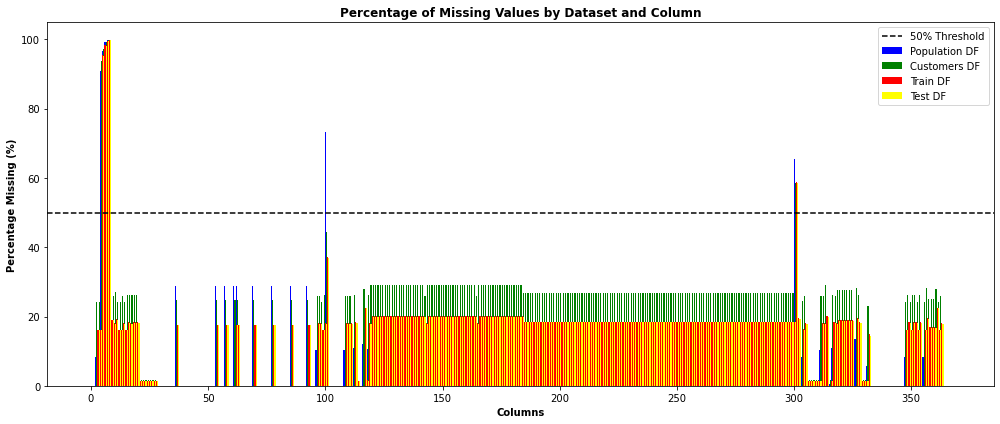

In [8]:
# Set up the figure and axes
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Bar width
bar_width = 0.5

# Positions of bars
r1 = range(len(missing_percentage_combined_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bars
plt.bar(r1, missing_percentage_combined_df['missing_perc_population_df'], width=bar_width, label='Population DF', color='blue')
plt.bar(r2, missing_percentage_combined_df['missing_perc_customers_df'], width=bar_width, label='Customers DF', color='green')
plt.bar(r3, missing_percentage_combined_df['missing_perc_train_df'], width=bar_width, label='Train DF', color='red')
plt.bar(r4, missing_percentage_combined_df['missing_perc_test_df'], width=bar_width, label='Test DF', color='yellow')

# Title & subtitle
plt.title('Percentage of Missing Values by Dataset and Column', fontweight='bold')
plt.xlabel('Columns', fontweight='bold')
plt.ylabel('Percentage Missing (%)', fontweight='bold')

# Adding the reference line
plt.axhline(y=50, color='black', linestyle='--', label='50% Threshold')

# Create legend & show the plot
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# delete all unnecessary dataframes created for the previous analysis
del missing_percentage_combined_df
del missing_percentage_population_df
del missing_percentage_customers_df
del missing_percentage_train_df
del missing_percentage_test_df

__Analysis__: The idea of this analysis is to see which columns have more than 50% of missing data to discard them. We can see both in the bar charts and the table above that the distribution of the percentages of missing values per column look similar across the four datasets, which allows us to follow this approach and keep consistency for all datasets. 

There is one exception which can be seen at position 100 and refers to the column `EXTSEL992`: this column has only more than 50% of data missing for the population dataset but there isn't any information available in the data dictionaries about it, so we can also drop it.

__Step 1 for the cleaning function__:
 - manually drop 6 columns: `ALTER_KIND4`, `ALTER_KIND3`, `ALTER_KIND2`, `ALTER_KIND1`, `EXTSEL992` and `KK_KUNDENTYP`.

In [10]:
# Create a copy from the population_df to apply these steps during the data cleaning assessment
cleaned_population_df = population_df.copy()

In [11]:
# Apply step 1 of cleaning
cleaned_population_df = cleaned_population_df.drop(["ALTER_KIND4","ALTER_KIND3","ALTER_KIND3","ALTER_KIND2","ALTER_KIND1","EXTSEL992","KK_KUNDENTYP"], axis=1)

#### 1.1.2. Deal with rows with high percentage of missing data

In [12]:
# Get the percentage of missing data by row in the population dataset
perc_missing_row_level = 100 * (cleaned_population_df.isna().sum(axis=1) / len(cleaned_population_df.columns))

# Create bins every 10% with the counts of rows in each bin
bins = list(range(0, 101, 10))  # [0, 10, 20, ..., 100]

# Bin the data
bined_data = pd.cut(perc_missing_row_level, bins=bins, right=False, include_lowest=True)

# Count rows in each bin
bin_counts = bined_data.value_counts().sort_index()
bin_counts.head(10)

[0, 10)      751324
[10, 20)      24924
[20, 30)       9173
[30, 40)       6550
[40, 50)         16
[50, 60)       6072
[60, 70)      93144
[70, 80)         18
[80, 90)          0
[90, 100)         0
dtype: int64

In [13]:
# get the index of the rows with more than 50% missing data
rows_above_50 = perc_missing_row_level[perc_missing_row_level >= 50].index

# select these rows on the population dataset for further analysis
selected_population_df = cleaned_population_df.loc[rows_above_50]
selected_population_df.head(10)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_N

In [14]:
# delete all unnecessary dataframes created for the previous analysis
del selected_population_df
del perc_missing_row_level

__Analysis__: Although dropping rows is something we should always avoid, as we are potentially losing information, it is still something we need to consider here, as there are rows that have more than 50% of the data missing. Nevertheless, we should not do this blindly, but instead we could look at the meaning of the missing columns and see if there is any logic way of imputing this data from other columns.
- `ANZ_` columns: These columns refer to "Anzahl" which means count in German. We are dealing with counts of certain attributes like number of people living in the same household. It seems that there is no way to fill in these values in a logical way.
- `KBA13_` columns: These columns refer to the information about cars and car manufactures in the area of residence the person lives. The information about the area of residence can be found in the columns `PLZ8_`, which are also missing. Therefore, it is not possible to impute this data as well.

Based on this analysis we can be more certain that discarding these rows is a good decision.

__Step 2 for the cleaning function__:
- remove rows from the dataset which have more than 50% of the data missing.

In [15]:
# Apply step 2 of the cleaning process
cleaned_population_df = cleaned_population_df.drop(rows_above_50, axis=0)

#### 1.1.3. Deal with columns that do not hold any relevant information or are redundant.

The following columns were manually removed as they do not hold any relevant information:
- `LNR`: It seems is just an id. No information available in the data dictionary.
- `EINGEFUEGT_AM`: It seems to be a date when the person's information was added to the table. No information available in the data dictionary.
- `D19_LETZTER_KAUF_BRANCHE`, `D19_TELKO_ONLINE_QUOTE_12`, `D19_VERSI_ONLINE_QUOTE_12`, `D19_VERSI_ONLINE_DATUM`, `D19_SOZIALES`: These column deviate from the other D19 columns in their content or there isn't any information availalble in the data dictionary.
- `ALTERSKATEGORIE_FEIN`, `ALTERSKATEGORIE_GROB`: These columns are approximated age category columns, which are calculated using the name of the person. Since we can directly get the age from the column `GEBURTSJAHR`, these columns are redundant.
- `_24`columns: These columns refer to the last 24 months. Since there are already values for the last 12 months, these columns are redundant and will always be highly correlated.
- `_GROB` columns: We can remove these columns because they have the same information as the respective `_FEIN` columns but just in a higher level. The `_FEIN` columns are more granular and therefore more precise.
- Columns that are missing in the data dictionary: These columns cannot be interpreted, therefore it does not make sense to use them for further analysis.

__Step 3 for the cleaning function__:
 - manually drop the identified redundant columns
 - drop the colums without any reference in the data dictionary

In [16]:
# Apply step 3 of cleaning
cleaned_population_df = cleaned_population_df.drop(["LNR", "EINGEFUEGT_AM", "D19_LETZTER_KAUF_BRANCHE", "ALTERSKATEGORIE_FEIN",
                                                    "ALTERSKATEGORIE_GROB", "D19_TELKO_ONLINE_QUOTE_12", "D19_VERSI_ONLINE_QUOTE_12",
                                                    "D19_VERSI_ONLINE_DATUM", "LP_FAMILIE_GROB", "LP_LEBENSPHASE_GROB", 
                                                    "LP_STATUS_GROB", "D19_BANKEN_ANZ_24", "D19_GESAMT_ANZ_24", 
                                                    "D19_TELKO_ANZ_24", "D19_VERSAND_ANZ_24", "D19_VERSI_ANZ_24",
                                                    "D19_SOZIALES"], axis=1)

In [17]:
# Load the information available about the columns in the attributes CSV
attributes_df = pd.read_excel('data-dictionary\\DIAS Attributes - Values 2017.xlsx', usecols = [1,2,3,4], skiprows=1)
attributes_df = attributes_df.fillna(method="ffill")
attributes_df.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


In [18]:
# Get list of columns in the data dictionary
attributes_nms = list(attributes_df["Attribute"].unique())

# find columns that are not present in the data dictionary
cols_not_present = [col for col in cleaned_population_df.columns if col not in attributes_nms]

# Remove the D19_ columns from the list as they are present with another name
cols_not_present = [col for col in cols_not_present if "D19_" not in col]

# Remove "EINGEZOGENAM_HH_JAHR" because it is possible to derive its meaning
cols_not_present.remove("EINGEZOGENAM_HH_JAHR")

print(cols_not_present)

['AKT_DAT_KL', 'ANZ_KINDER', 'ANZ_STATISTISCHE_HAUSHALTE', 'ARBEIT', 'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'DSL_FLAG', 'FIRMENDICHTE', 'GEMEINDETYP', 'HH_DELTA_FLAG', 'KBA13_ANTG1', 'KBA13_ANTG2', 'KBA13_ANTG3', 'KBA13_ANTG4', 'KBA13_BAUMAX', 'KBA13_CCM_1401_2500', 'KBA13_GBZ', 'KBA13_HHZ', 'KBA13_KMH_210', 'KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'SOHO_KZ', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11']


In [19]:
cleaned_population_df = cleaned_population_df.drop(cols_not_present, axis=1)

#### 1.1.4. Deal with missing data
To deal with the missing data we can these approaches:
1. Use the information of another column to impute a value in a logical way.
2. Manually deal with each column that does not appear in the data dictionary.
3. Use the information available in the data dictionary as there are multiple columns for which there is a value for the "unknown" information.

First let us see which columns have missing data and try the first approach.

In [20]:
# Find and print the number columns with missing data
cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()
print(f"Number of columns with missing data: {len(cols_with_missing_data)}")

Number of columns with missing data: 203


#### 1.1.4.1 Deal with missing data for columns with information available in the data dictionary - Part 1

In [21]:
# Create a copy of the cleaned dataframe in the previous step
copy_cleaned_population_df = cleaned_population_df.copy()

In [22]:
# Get the columns with missing data
cols_with_missing_data = copy_cleaned_population_df.columns[copy_cleaned_population_df.isnull().any()].tolist()

In [23]:
# Print the columns with missing data in the population dataset that are not available in the attributes dataset
attibutes_df_cols = attributes_df["Attribute"].unique().tolist()
cols_with_missing_data_with_missing_info = [col for col in cols_with_missing_data if col not in attibutes_df_cols]

print(cols_with_missing_data_with_missing_info)

['D19_LOTTO']


`D19_LOTTO`: The `D9_` columns in the data dictionary use 0 for the "unknown" values, so the same procedure will be used here.

In [24]:
# Fill nulls with 0
copy_cleaned_population_df["D19_LOTTO"] = copy_cleaned_population_df["D19_LOTTO"].fillna(0)

In [25]:
# delete all unnecessary dataframes created for the previous analysis
del copy_cleaned_population_df

__Step 4.1 for cleaning function__:
- fill missing values for `D19_LOTTO` with 0.

In [26]:
# Apply step 4.1 of cleaning
cleaned_population_df["D19_LOTTO"] = cleaned_population_df["D19_LOTTO"].fillna(0)  

In [27]:
# Get the columns with missing data
cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()

In [28]:
# Check if there is any column with missing data that is not available in the data dictionary
cols_with_missing_data_with_missing_info = [col for col in cols_with_missing_data if col not in attibutes_df_cols]
cols_with_missing_data_with_missing_info

[]

#### 1.1.4.2 Deal with missing data for columns with information available in the data dictionary - Part 2
In this section we will use the information available in the attributes dataset to fill the missing values with the corresponding "unknown" values. Depending on the group of columns, these values are labelled as "unknown" and can have two different values assigned: -1 and 9. We will need to identify and treat them accordingly.

Another aspect of the attributes' dataset is that some columns do not have any unknown value, if they are simply a count, or can have different labels like "none" or "no transactions known" assigned to the unknowns'.

We will start by treating the columns which use the label "unknown" and work our way through the columns left.

In [29]:
# create a new copy of the current state of the cleaning process
copy_cleaned_population_df = cleaned_population_df.copy()

In [30]:
# Check which columns still have missing data
cols_with_missing_data = copy_cleaned_population_df.columns[copy_cleaned_population_df.isnull().any()].tolist()
print(cols_with_missing_data)

['ANZ_HH_TITEL', 'BALLRAUM', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CJT_GESAMTTYP', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_VERSAND_ONLINE_QUOTE_12', 'EWDICHTE', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'INNENSTADT', 'KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_AUTOQUOT', 'KBA05_BAUMAX', 'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_GBZ', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW1', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MAXHERST', 'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1', 'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 'KBA05_MOD8', 'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1', 'KBA05_SEG10

In [31]:
# Build a dictionary with columns and their "unknown" values
unknown_cols_dict = {}

for row in attributes_df[attributes_df["Meaning"] == "unknown"].iterrows():
    column_nm = row[1][0]
    values = row[1][2]
    
    # try converting to int or string depending on the number of values
    try:
        values = int(values)
    except ValueError:
        values = str(values)
    
    unknown_cols_dict[column_nm] = values

unknown_cols_dict

{'AGER_TYP': -1,
 'ALTERSKATEGORIE_GROB': '-1, 0',
 'ANREDE_KZ': '-1, 0',
 'BALLRAUM': -1,
 'BIP_FLAG': -1,
 'CAMEO_DEUG_2015': -1,
 'CAMEO_DEUINTL_2015': -1,
 'CJT_GESAMTTYP': 0,
 'D19_KK_KUNDENTYP': -1,
 'EWDICHTE': -1,
 'FINANZTYP': -1,
 'FINANZ_ANLEGER': -1,
 'FINANZ_HAUSBAUER': -1,
 'FINANZ_MINIMALIST': -1,
 'FINANZ_SPARER': -1,
 'FINANZ_UNAUFFAELLIGER': -1,
 'FINANZ_VORSORGER': -1,
 'GEBAEUDETYP': '-1, 0',
 'GEOSCORE_KLS7': '-1, 0',
 'HAUSHALTSSTRUKTUR': '-1, 0',
 'HEALTH_TYP': -1,
 'HH_EINKOMMEN_SCORE': '-1, 0',
 'INNENSTADT': -1,
 'KBA05_ALTER1': '-1, 9',
 'KBA05_ALTER2': '-1, 9',
 'KBA05_ALTER3': '-1, 9',
 'KBA05_ALTER4': '-1, 9',
 'KBA05_ANHANG': '-1, 9',
 'KBA05_ANTG1': -1,
 'KBA05_ANTG2': -1,
 'KBA05_ANTG3': -1,
 'KBA05_ANTG4': -1,
 'KBA05_AUTOQUOT': '-1, 9',
 'KBA05_BAUMAX': '-1, 0',
 'KBA05_CCM1': '-1, 9',
 'KBA05_CCM2': '-1, 9',
 'KBA05_CCM3': '-1, 9',
 'KBA05_CCM4': '-1, 9',
 'KBA05_DIESEL': '-1, 9',
 'KBA05_FRAU': '-1, 9',
 'KBA05_GBZ': '-1, 0',
 'KBA05_HERST1': '-1, 9

In [32]:
# Fill the missing values using the corresponding "unknown" values whenever available
for col in cols_with_missing_data:   
    # See if column is available in the dictionary
    try:
        values = unknown_cols_dict[col]
        
        # See how many values are avaible for "unknown"
        if type(values) == int:
            copy_cleaned_population_df[col] = copy_cleaned_population_df[col].fillna(values)

        # use the first one to fill missing data and try replacing the second value in the column's values for consistency
        else:
            values = list(values.split(","))
            value_1 = int(values[0].strip())
            value_2 = int(values[1].strip())
            
            copy_cleaned_population_df[col] = copy_cleaned_population_df[col].fillna(value_1)
            copy_cleaned_population_df[col] = copy_cleaned_population_df[col].replace(value_2, value_1)
            
    except KeyError:
        continue

In [33]:
# Check which columns still have missing data
cols_with_missing_data = copy_cleaned_population_df.columns[copy_cleaned_population_df.isnull().any()].tolist()
print(cols_with_missing_data)

['ANZ_HH_TITEL', 'CAMEO_DEU_2015', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_VERSAND_ONLINE_QUOTE_12', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'KBA13_ANZAHL_PKW', 'KONSUMNAEHE', 'LP_FAMILIE_FEIN', 'LP_LEBENSPHASE_FEIN', 'LP_STATUS_FEIN', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'PLZ8_BAUMAX']


In [34]:
# Build a dictionary with columns and their "no transactions" values
unknown_cols_dict = {}

for row in attributes_df[attributes_df["Meaning"].str.upper().str.contains('.*NO.*TRANSACTIONS.*')].iterrows():
    column_nm = row[1][0]
    values = row[1][2]
    
    unknown_cols_dict[column_nm] = values

unknown_cols_dict

{'D19_BANKEN_ANZ_12': 0,
 'D19_BANKEN_ANZ_24': 0,
 'D19_BANKEN_DATUM': 10,
 'D19_BANKEN_OFFLINE_DATUM': 10,
 'D19_BANKEN_ONLINE_DATUM': 10,
 'D19_BANKEN_ONLINE_QUOTE_12': 0,
 'D19_GESAMT_ANZ_12': 0,
 'D19_GESAMT_ANZ_24': 0,
 'D19_GESAMT_DATUM': 10,
 'D19_GESAMT_OFFLINE_DATUM': 10,
 'D19_GESAMT_ONLINE_DATUM': 10,
 'D19_GESAMT_ONLINE_QUOTE_12': 0,
 'D19_TELKO_ANZ_12': 0,
 'D19_TELKO_ANZ_24': 0,
 'D19_TELKO_DATUM': 10,
 'D19_TELKO_OFFLINE_DATUM': 10,
 'D19_TELKO_ONLINE_DATUM': 10,
 'D19_VERSAND_ANZ_12': 0,
 'D19_VERSAND_ANZ_24': 0,
 'D19_VERSAND_DATUM': 10,
 'D19_VERSAND_OFFLINE_DATUM': 10,
 'D19_VERSAND_ONLINE_DATUM': 10,
 'D19_VERSAND_ONLINE_QUOTE_12': 0,
 'D19_VERSI_ANZ_12': 0,
 'D19_VERSI_ANZ_24': 0}

In [35]:
# Fill the missing values using the corresponding "no transactions" values whenever available
for col in cols_with_missing_data:   
    # See if column is available in the dictionary
    try:
        values = int(unknown_cols_dict[col])
        
        copy_cleaned_population_df[col] = copy_cleaned_population_df[col].fillna(values)
        
    except KeyError:
        continue

In [36]:
# Check which columns still have missing data
cols_with_missing_data = copy_cleaned_population_df.columns[copy_cleaned_population_df.isnull().any()].tolist()
print(cols_with_missing_data)

['ANZ_HH_TITEL', 'CAMEO_DEU_2015', 'D19_KONSUMTYP', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'KBA13_ANZAHL_PKW', 'KONSUMNAEHE', 'LP_FAMILIE_FEIN', 'LP_LEBENSPHASE_FEIN', 'LP_STATUS_FEIN', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'PLZ8_BAUMAX']


In [37]:
# see how many rows have missing data for each particular column:
print("Percentage of missing data per column:")
print("--------------------------------------")
for col in cols_with_missing_data:
    print(f"{col}: {round(copy_cleaned_population_df[col].isna().sum()/len(copy_cleaned_population_df) *100,1)}%")

Percentage of missing data per column:
--------------------------------------
ANZ_HH_TITEL: 0.5%
CAMEO_DEU_2015: 0.5%
D19_KONSUMTYP: 22.5%
GEBAEUDETYP_RASTER: 0.0%
GFK_URLAUBERTYP: 0.6%
KBA13_ANZAHL_PKW: 0.8%
KONSUMNAEHE: 0.0%
LP_FAMILIE_FEIN: 0.6%
LP_LEBENSPHASE_FEIN: 0.6%
LP_STATUS_FEIN: 0.6%
MOBI_REGIO: 4.3%
ONLINE_AFFINITAET: 0.6%
PLZ8_BAUMAX: 2.2%


__Observation:__ There are several columns which still have some missing data. One quick solution to solve this issue could be to drop the rows which have some missing data, but this could lead to a loss of valuable information.

Another idea is to try and fill the columns based on some logic. While it may not be the perfect solution it is in my perspective better than simply discard the rows. These columns can be group in the following contextual groups:

- Consumer-behavioral columns: `ANZ_HH_TITEL`, `CAMEO_DEU_2015`, `GFK_URLAUBERTYP`, `LP_FAMILIE_FEIN`, `LP_LEBENSPHASE_FEIN`, `LP_STATUS_FEIN`, `MOBI_REGIO` and `ONLINE_AFFINITAET`.
- Location-based columns: `GEBAEUDETYP_RASTER`, `KBA13_ANZAHL_PKW`, `PLZ8_BAUMAX` and `KONSUMNAEHE`.

__Actions:__
- Drop Column `D19_KONSUMTYP`: This column has 22% of the data missing and since there is already another similar column containing all the data (`D19_KONSUMTYP_MAX`) it is safe to drop it. Another problem would be to fill in this data, since the values are categorical and there is one value that corresponds to "inactive" and when the data is missing there is a unique value of 9 in `D19_KONSUMTYP_MAX`. Therefore it is difficult to make an assessment here.

- Fill missing values of column `CAMEO_DEU_2015` with "XX". Although it is not specified in the data dictionary, this seems to be the value used for unavailable information.

- To fill in the __consumer-behavioral__ columns we can use the information of the `CAMEO_` columns, which include a customer segmentation encoding, that can be use for explaining the consumer behavior of a group (more info can be found [here](https://newsroom.transunion.co.uk/new-cameo-germany-offers-unparalleled-consumer-segmentation/)). Therefore, the idea is this column to fill in the missing values of the other columns using the most common value for the respective category.

- To deal with  the __location-based__  we will use the available similar columns of the same grouping to find the most common values for the respective category. In some case we will just replace with the respective unknown value.

In [38]:
# Drop column D19_KONSUMTYP
copy_cleaned_population_df = copy_cleaned_population_df.drop("D19_KONSUMTYP", axis=1)

In [39]:
# Check which columns still have missing data
cols_with_missing_data = copy_cleaned_population_df.columns[copy_cleaned_population_df.isnull().any()].tolist()
print(cols_with_missing_data)

['ANZ_HH_TITEL', 'CAMEO_DEU_2015', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'KBA13_ANZAHL_PKW', 'KONSUMNAEHE', 'LP_FAMILIE_FEIN', 'LP_LEBENSPHASE_FEIN', 'LP_STATUS_FEIN', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'PLZ8_BAUMAX']


In [40]:
# Fill NA for CAMEO_DEU_2015 with "XX"
copy_cleaned_population_df["CAMEO_DEU_2015"] = copy_cleaned_population_df["CAMEO_DEU_2015"].fillna("XX")

In [41]:
# fill missing data for consumer-behavioral columns using the CAMEO_ columns
consumer_behavioral_cols = ["ANZ_HH_TITEL", "GFK_URLAUBERTYP", "LP_FAMILIE_FEIN", 
                            "LP_LEBENSPHASE_FEIN", "LP_STATUS_FEIN", "MOBI_REGIO", "ONLINE_AFFINITAET"]

CAMEO_cols = ["CAMEO_DEU_2015", "CAMEO_DEUG_2015"]

# Define a function to get the mode
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else None

for col in consumer_behavioral_cols:
    copy_cleaned_population_df[col] = copy_cleaned_population_df[col].fillna(copy_cleaned_population_df.groupby(CAMEO_cols)[col].transform(get_mode))

In [42]:
# fill missing data for the location-based columns using the other similar columns
# KBA13_ANZAHL_PKW
copy_cleaned_population_df["KBA13_ANZAHL_PKW"] = copy_cleaned_population_df["KBA13_ANZAHL_PKW"].fillna(-1)

# PLZ8_BAUMAX
copy_cleaned_population_df["PLZ8_BAUMAX"] = copy_cleaned_population_df["PLZ8_BAUMAX"].fillna(-1)

# GEBAEUDETYP_RASTER
location_based_cols = [col for col in copy_cleaned_population_df.columns if "KBA13" in col or "PLZ8" in col]
copy_cleaned_population_df["GEBAEUDETYP_RASTER"] = copy_cleaned_population_df["GEBAEUDETYP_RASTER"].fillna(copy_cleaned_population_df.groupby(location_based_cols)["GEBAEUDETYP_RASTER"].transform(get_mode))

# KONSUMNAEHE
copy_cleaned_population_df["KONSUMNAEHE"] = copy_cleaned_population_df["KONSUMNAEHE"].fillna(copy_cleaned_population_df.groupby(location_based_cols)["KONSUMNAEHE"].transform(get_mode))

In [43]:
# see how many rows have missing data for each particular column:
print("Number of missing data per column:")
print("--------------------------------------")
for col in cols_with_missing_data:
    print(f"{col}: {copy_cleaned_population_df[col].isna().sum()}")

Number of missing data per column:
--------------------------------------
ANZ_HH_TITEL: 0
CAMEO_DEU_2015: 0
GEBAEUDETYP_RASTER: 1
GFK_URLAUBERTYP: 0
KBA13_ANZAHL_PKW: 0
KONSUMNAEHE: 8
LP_FAMILIE_FEIN: 0
LP_LEBENSPHASE_FEIN: 0
LP_STATUS_FEIN: 0
MOBI_REGIO: 0
ONLINE_AFFINITAET: 0
PLZ8_BAUMAX: 0


In [44]:
# manually drop the rows for which the missing values could not be filled
index_drop_rows = []

for col in cols_with_missing_data:
    index_drop_rows += list(copy_cleaned_population_df[copy_cleaned_population_df[col].isna()].index)
    
copy_cleaned_population_df = copy_cleaned_population_df.drop(index_drop_rows, axis=0)   

In [45]:
# Check which columns still have missing data
cols_with_missing_data = copy_cleaned_population_df.columns[copy_cleaned_population_df.isnull().any()].tolist()
print(cols_with_missing_data)

[]


In [46]:
len(copy_cleaned_population_df)

791979

In [47]:
# delete all unnecessary dataframes created for the previous analysis
del copy_cleaned_population_df

__Step 4.2 for cleaning function__:
- replace missing data for columns which have an "unknown" value in the data dictionary
- replace missing data for columns which have a "no transactions" value in the data dictionary
- drop `D19_KONSUMTYP`column.
- fill missing values for `CAMEO_DEU_2015` column with "XX".
- fill missing data for consumer-behavioral column using the `CAMEO_` columns.
- fill missing values for `KBA13_ANZAHL_PKW` column with -1.
- fill missing values for `PLZ8_BAUMAX` column with -1.
- fill missing values for `GEBAEUDETYP_RASTER` and `KONSUMNAEHE` column with location-based columns.
- drop rows for which the missing values could not be filled.

In [48]:
# get the columns with missing data
cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()

# Build a dictionary with columns and their "unknown" values

unknown_cols_dict = {}

for row in attributes_df[attributes_df["Meaning"] == "unknown"].iterrows():
    column_nm = row[1][0]
    values = row[1][2]
    
    # try converting to int or string depending on the number of values
    try:
        values = int(values)
    except ValueError:
        values = str(values)
    
    unknown_cols_dict[column_nm] = values

# Fill the missing values using the corresponding "unknown" values whenever available
for col in cols_with_missing_data:   
    # See if column is available in the dictionary
    try:
        values = unknown_cols_dict[col]
        
        # See how many values are avaible for "unknown"
        if type(values) == int:
            cleaned_population_df[col] = cleaned_population_df[col].fillna(values)

        # use the first one to fill missing data and try replacing the second value in the column's values for consistency
        else:
            values = list(values.split(","))
            value_1 = int(values[0].strip())
            value_2 = int(values[1].strip())
            
            cleaned_population_df[col] = cleaned_population_df[col].fillna(value_1)
            cleaned_population_df[col] = cleaned_population_df[col].replace(value_2, value_1)
            
    except KeyError:
        continue

cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()
       
# Build a dictionary with columns and their "no transactions" values
no_trxns_cols_dict = {}

for row in attributes_df[attributes_df["Meaning"].str.upper().str.contains('.*NO.*TRANSACTIONS.*')].iterrows():
    column_nm = row[1][0]
    values = row[1][2]
    
    no_trxns_cols_dict[column_nm] = values

# Fill the missing values using the corresponding "no transactions" values whenever available
for col in cols_with_missing_data:   
    # See if column is available in the dictionary
    try:
        values = int(no_trxns_cols_dict[col])
        
        cleaned_population_df[col] = cleaned_population_df[col].fillna(values)
        
    except KeyError:
        continue   
        
cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()

# Drop column D19_KONSUMTYP
cleaned_population_df = cleaned_population_df.drop("D19_KONSUMTYP", axis=1)

# Fill NA for CAMEO_DEU_2015 with "XX"
cleaned_population_df["CAMEO_DEU_2015"] = cleaned_population_df["CAMEO_DEU_2015"].fillna("XX")

# fill missing data for consumer-behavioral columns using the CAMEO_ columns
consumer_behavioral_cols = ["ANZ_HH_TITEL", "GFK_URLAUBERTYP", "LP_FAMILIE_FEIN", 
                            "LP_LEBENSPHASE_FEIN", "LP_STATUS_FEIN", "MOBI_REGIO", "ONLINE_AFFINITAET"]

CAMEO_cols = ["CAMEO_DEU_2015", "CAMEO_DEUG_2015"]

# Define a function to get the mode
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else None

for col in consumer_behavioral_cols:
    cleaned_population_df[col] = cleaned_population_df[col].fillna(cleaned_population_df.groupby(CAMEO_cols)[col].transform(get_mode))
    
# fill missing data for the location-based columns using the other similar columns:
# KBA13_ANZAHL_PKW with -1
cleaned_population_df["KBA13_ANZAHL_PKW"] = cleaned_population_df["KBA13_ANZAHL_PKW"].fillna(-1)

# PLZ8_BAUMAX with -1
cleaned_population_df["PLZ8_BAUMAX"] = cleaned_population_df["PLZ8_BAUMAX"].fillna(-1)

# GEBAEUDETYP_RASTER
location_based_cols = [col for col in cleaned_population_df.columns if "KBA13" in col or "PLZ8" in col]
cleaned_population_df["GEBAEUDETYP_RASTER"] = cleaned_population_df["GEBAEUDETYP_RASTER"].fillna(cleaned_population_df.groupby(location_based_cols)["GEBAEUDETYP_RASTER"].transform(get_mode))

# KONSUMNAEHE
cleaned_population_df["KONSUMNAEHE"] = cleaned_population_df["KONSUMNAEHE"].fillna(cleaned_population_df.groupby(location_based_cols)["KONSUMNAEHE"].transform(get_mode))

# manually drop the rows for which the missing values could not be filled
cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()
index_drop_rows = []

for col in cols_with_missing_data:
    index_drop_rows += list(cleaned_population_df[cleaned_population_df[col].isna()].index)
    
cleaned_population_df = cleaned_population_df.drop(index_drop_rows, axis=0)   

In [49]:
cols_with_missing_data = cleaned_population_df.columns[cleaned_population_df.isnull().any()].tolist()
cols_with_missing_data

[]

In [50]:
print(len(cleaned_population_df))

791979


#### 1.1.6 Encode Categorical Variables
In this dataset there are some columns string types, which we will have to encode in other to use them for the algorithms. The ordinal categorical columns will be left as they are and scaled before being fed to the algorithms. To understand which columns, need to be cleaned we can first look at their type.

In [51]:
cleaned_cleaned_population_df = cleaned_population_df.copy()

In [52]:
# Collect column type and unique values into a dictionary and create a dataframe
col_types = {}

for col in cleaned_cleaned_population_df.columns:
    col_type = str(cleaned_cleaned_population_df[col].dtype)
    unique_values = list(cleaned_cleaned_population_df[col].unique())
    col_types[col] = [col_type, unique_values]

col_types_df = pd.DataFrame.from_dict(col_types, orient="index", columns=['col_type', 'unique_values'])
col_types_df

,col_type,unique_values
AGER_TYP,int64,"[-1, 2, 3, 0, 1]"
ALTER_HH,float64,"[0.0, 17.0, 13.0, 20.0, 10.0, 14.0, 16.0, 21.0, 11.0, 19.0, 15.0, 9.0, 18.0, 8.0, 7.0, 12.0, 4.0, 3.0, 6.0, 5.0, 2.0, 1.0]"
ANZ_HAUSHALTE_AKTIV,float64,"[11.0, 10.0, 1.0, 3.0, 5.0, 4.0, 6.0, 2.0, 9.0, 0.0, 14.0, 13.0, 8.0, 7.0, 44.0, 25.0, 36.0, 16.0, 272.0, 33.0, 15.0, 12.0, 22.0, 21.0, 20.0, 67.0, 23.0, 18.0, 27.0, 24.0, 31.0, 39.0, 19.0, 30.0, 17.0, 29.0, 61.0, 54.0, 88.0, 49.0, 60.0, 38.0, 34.0, 48.0, 35.0, 62.0, 26.0, 45.0, 42.0, 28.0, 77.0, 47.0, 50.0, 236.0, 137.0, 43.0, 52.0, 41.0, 76.0, 63.0, 32.0, 40.0, 37.0, 59.0, 53.0, 57.0, 118.0, 95.0, 78.0, 70.0, 46.0, 185.0, 73.0, 154.0, 80.0, 102.0, 92.0, 126.0, 94.0, 71.0, 66.0, 68.0, 81.0, 69.0, 121.0, 258.0, 58.0, 86.0, 124.0, 85.0, 90.0, 128.0, 51.0, 72.0, 64.0, 56.0, 83.0, 150.0, 259.0, 91.0, ...]"
ANZ_HH_TITEL,float64,"[0.0, 1.0, 5.0, 2.0, 3.0, 7.0, 4.0, 6.0, 9.0, 15.0, 14.0, 8.0, 11.0, 10.0, 12.0, 13.0, 20.0, 16.0, 17.0, 23.0, 18.0]"
ANZ_PERSONEN,float64,"[2.0, 1.0, 0.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 12.0, 9.0, 21.0, 10.0, 13.0, 11.0, 14.0, 45.0, 20.0, 31.0, 37.0, 16.0, 22.0, 15.0, 23.0, 18.0, 35.0, 17.0, 40.0, 38.0]"
ANZ_TITEL,float64,"[0.0, 1.0, 2.0, 4.0, 3.0]"
BALLRAUM,float64,"[6.0, 2.0, 4.0, 3.0, 7.0, 1.0, 5.0, -1.0]"
CAMEO_DEU_2015,object,"[8A, 4C, 2A, 6B, 8C, 4A, 2D, 1A, 1E, 9D, 5C, 8B, 7A, 5D, 9E, 9B, 1B, 3D, XX, 4E, 4B, 3C, 5A, 7B, 9A, 6D, 6E, 2C, 7C, 9C, 7D, 5E, 1D, 8D, 6C, 6A, 5B, 4D, 3A, 2B, 7E, 3B, 6F, 5F, 1C]"
CAMEO_DEUG_2015,object,"[8, 4, 2, 6, 1, 9, 5, 7, 3, -1, X]"
CJT_GESAMTTYP,float64,"[5.0, 3.0, 2.0, 4.0, 1.0, 6.0, 0.0]"


In [53]:
# Print all available types
print(list(col_types_df["col_type"].unique()))

['int64', 'float64', 'object']


In [54]:
# Check which columns are not nummeric
col_types_df[col_types_df["col_type"] == "object"]

,col_type,unique_values
CAMEO_DEU_2015,object,"[8A, 4C, 2A, 6B, 8C, 4A, 2D, 1A, 1E, 9D, 5C, 8B, 7A, 5D, 9E, 9B, 1B, 3D, XX, 4E, 4B, 3C, 5A, 7B, 9A, 6D, 6E, 2C, 7C, 9C, 7D, 5E, 1D, 8D, 6C, 6A, 5B, 4D, 3A, 2B, 7E, 3B, 6F, 5F, 1C]"
CAMEO_DEUG_2015,object,"[8, 4, 2, 6, 1, 9, 5, 7, 3, -1, X]"
OST_WEST_KZ,object,"[W, O]"


- `OST_WEST_KZ`: this column can be easily converted to binary, where W=1 and O=0.
- `CAMEO_DEUG_2015`: Since most values are nummeric we can convert X to 0, which is not used yet.
- `CAMEO_DEU_2015`: This column will be be one-hot encoded into dummies.

In [55]:
# encode column OST_WEST_KZ:
cleaned_cleaned_population_df["OST_WEST_KZ"] = cleaned_cleaned_population_df["OST_WEST_KZ"].map({"W":1, "O":0})

In [56]:
# encode column CAMEO_DEUG_2015:
cleaned_cleaned_population_df["CAMEO_DEUG_2015"] = cleaned_cleaned_population_df["CAMEO_DEUG_2015"].replace("X", 0)
cleaned_cleaned_population_df["CAMEO_DEUG_2015"] = cleaned_cleaned_population_df["CAMEO_DEUG_2015"].astype(float)

In [57]:
# encode column CAMEO_DEU_2015:
dummy_cols = pd.get_dummies(cleaned_cleaned_population_df["CAMEO_DEU_2015"]).columns
dummy_cols = ["CAMEO_DEU_2015_"+col for col in dummy_cols]

cleaned_cleaned_population_df[dummy_cols] = pd.get_dummies(cleaned_cleaned_population_df["CAMEO_DEU_2015"])

cleaned_cleaned_population_df = cleaned_cleaned_population_df.drop(["CAMEO_DEU_2015"],axis=1)

In [58]:
del cleaned_cleaned_population_df

__Step 6 for cleaning function__:
- encode columns `OST_WEST_KZ`, `CAMEO_DEUG_2015` and `CAMEO_DEU_2015`

In [59]:
# encode column OST_WEST_KZ:
cleaned_population_df["OST_WEST_KZ"] = cleaned_population_df["OST_WEST_KZ"].map({"W":1, "O":0})

# encode column CAMEO_DEUG_2015:
cleaned_population_df["CAMEO_DEUG_2015"] = cleaned_population_df["CAMEO_DEUG_2015"].replace("X", 0)
cleaned_population_df["CAMEO_DEUG_2015"] = cleaned_population_df["CAMEO_DEUG_2015"].astype(float)

# encode column CAMEO_DEU_2015:
dummy_cols = pd.get_dummies(cleaned_population_df["CAMEO_DEU_2015"]).columns
dummy_cols = ["CAMEO_DEU_2015_"+col for col in dummy_cols]

cleaned_population_df[dummy_cols] = pd.get_dummies(cleaned_population_df["CAMEO_DEU_2015"])

cleaned_population_df = cleaned_population_df.drop(["CAMEO_DEU_2015"],axis=1)

In [60]:
print(f"Number of columns: {len(cleaned_population_df.columns)}")

Number of columns: 344


#### 1.1.6 Feature Engineering
In this part we will deal with columns that have a year as value. Based on the year we will calculate the age of that column with reference to the year 2023.

In [61]:
cleaned_cleaned_population_df = cleaned_population_df.copy()

In [62]:
# convert date columns to a relative number (age) to 2023
date_columns = ["EINGEZOGENAM_HH_JAHR", "GEBURTSJAHR", "MIN_GEBAEUDEJAHR"]

for col in date_columns:
    cleaned_cleaned_population_df[col+"_RTV23"] = 2023 - cleaned_cleaned_population_df[col]
    cleaned_cleaned_population_df = cleaned_cleaned_population_df.drop(col, axis=1)

In [63]:
# Check if there aren't any non-nummeric columns left
for col in cleaned_cleaned_population_df.columns:
    col_type = str(cleaned_cleaned_population_df[col].dtype)
    if col_type not in ("int64","float64", "uint8"):
        print(f"Column {col} is of type {col_type}.")  

In [64]:
del cleaned_cleaned_population_df

__Step 7 for cleaning function__:
- Convert year columns `EINGEZOGENAM_HH_JAHR`, `GEBURTSJAHR`, `MIN_GEBAEUDEJAHR` to a relative number (age)

In [65]:
# convert date columns to a relative number (age) to 2023
date_columns = ["EINGEZOGENAM_HH_JAHR", "GEBURTSJAHR", "MIN_GEBAEUDEJAHR"]

for col in date_columns:
    cleaned_population_df[col+"_RTV23"] = 2023 - cleaned_population_df[col]
    cleaned_population_df = cleaned_population_df.drop(col, axis=1)

In [66]:
# Check if there aren't any non-nummeric columns left
for col in cleaned_population_df.columns:
    col_type = str(cleaned_population_df[col].dtype)
    if col_type not in ("int64","float64", "uint8"):
        print(f"Column {col} is of type {col_type}.")  

### 2. Data cleaning function
In this section we will build a function that applies all steps we established so it can be passed to all four datasets.

Summarized, the processing steps will be as follows:
1. Manually drop the columns which have more than 50% of the data missing: `ALTER_KIND4`, `ALTER_KIND3`, `ALTER_KIND2`, `ALTER_KIND1`, `EXTSEL992` and `KK_KUNDENTYP`.
2. Find and automatically remove the rows from the dataset which have more than 50% of the data missing.
3. Manually drop the columns, which do not hold any relevant data, are redundant and which are not referenced in the data dictionary.
4. Deal with missing data:

    4.1. Part 1:
    - fill missing values for `D19_LOTTO` with 0.

    4.2. Part 2:

    - replace missing data for columns which have an "unknown" value in the data dictionary
    - replace missing data for columns which have a "no transactions" value in the data dictionary
    - drop `D19_KONSUMTYP`column.
    - fill missing values for `CAMEO_DEU_2015` column with "XX".
    - fill missing data for consumer-behavioral column using the `CAMEO_` columns.
    - fill missing values for `KBA13_ANZAHL_PKW` column with -1.
    - fill missing values for `PLZ8_BAUMAX` column with -1.
    - fill missing values for `GEBAEUDETYP_RASTER` and `KONSUMNAEHE` column with location-based columns.
    - drop rows for which the missing values could not be filled.
5. Encode columns `OST_WEST_KZ`, `CAMEO_DEUG_2015` and `CAMEO_DEU_2015`
6. Convert year columns `EINGEZOGENAM_HH_JAHR`, `GEBURTSJAHR`, `MIN_GEBAEUDEJAHR` to a relative number (age).

In [71]:
def clean_and_process_data(df, attributes_df):
    """
    DESCRIPTION
    -----------
    This function takes is used to cleaned and process the Arvarto datasets with consumer data relating to the German population.
    It has the processing following 7 steps:
    1. Manually drop the columns which have more than 50% of the data missing: `ALTER_KIND4`, `ALTER_KIND3`, `ALTER_KIND2`, `ALTER_KIND1`, `EXTSEL992` and `KK_KUNDENTYP`.    
    2. Find and automatically remove the rows from the dataset which have more than 50% of the data missing.
    3. Drop  columns, which do not hold any relevant data are redundant or are not referenced in the data dictionary.
    4. Deal with missing data:
        4.1 Deal with missing data for columns with information available in the data dictionary - Part 1:
            - fill missing values for `D19_LOTTO` with 0.     
        4.2 Deal with missing data for columns with information available in the data dictionary - Part 2:
            - replace missing data for columns which have an "unknown" value in the data dictionary
            - replace missing data for columns which have a "no transactions" value in the data dictionary
            - drop `D19_KONSUMTYP`column due to too many missing values.
            - fill missing values for `CAMEO_DEU_2015` column with "XX".
            - fill missing data for consumer-behavioral column using the `CAMEO_` columns.
            - fill missing values for `KBA13_ANZAHL_PKW` column with -1.
            - fill missing values for `PLZ8_BAUMAX` column with -1.
            - fill missing values for `GEBAEUDETYP_RASTER` and `KONSUMNAEHE` column with location-based columns.
            - drop rows for which the missing values could not be filled.
    5. Encode columns `OST_WEST_KZ`, `CAMEO_DEUG_2015` and `CAMEO_DEU_2015`
    6. Convert year columns `EINGEZOGENAM_HH_JAHR`, `GEBURTSJAHR`, `MIN_GEBAEUDEJAHR` to a relative number (age).
    
    PARAMETERS:
    -----------
        df (dataframe): The dataset to be cleaned.
        attributes_df (dataframe): A dataset which contains information about each feature, like the type of values.
        
    RETURN:
    --------
        df(dataframe): The processed dataframe.
    """
    
    print("Starting data processing...")
    
    # Apply step 1 of the cleaning process
    ######################################
    df = df.drop(["ALTER_KIND4","ALTER_KIND3","ALTER_KIND3","ALTER_KIND2","ALTER_KIND1","EXTSEL992","KK_KUNDENTYP"], axis=1)
    print("Step 1 of 6 completed!")
    
    # Apply step 2 of the cleaning process
    ######################################
    # Get the percentage of missing data by row in the dataset
    perc_missing_row_level = 100 * (df.isna().sum(axis=1) / len(df.columns))
    
    # get the index of the rows with more than 50% missing data
    rows_above_50 = perc_missing_row_level[perc_missing_row_level >= 50].index
    
    # drop the rows with more than 50% missing data
    df = df.drop(rows_above_50, axis=0)
    print("Step 2 of 6 completed!")
 
    # Apply step 3 of the cleaning process
    ######################################
    df = df.drop(["LNR", "EINGEFUEGT_AM", "D19_LETZTER_KAUF_BRANCHE", "ALTERSKATEGORIE_FEIN",
                 "ALTERSKATEGORIE_GROB", "D19_TELKO_ONLINE_QUOTE_12", "D19_VERSI_ONLINE_QUOTE_12",
                 "D19_VERSI_ONLINE_DATUM", "LP_FAMILIE_GROB", "LP_LEBENSPHASE_GROB", 
                 "LP_STATUS_GROB", "D19_BANKEN_ANZ_24", "D19_GESAMT_ANZ_24", 
                 "D19_TELKO_ANZ_24", "D19_VERSAND_ANZ_24", "D19_VERSI_ANZ_24"], axis=1)

    # Get list of columns in the data dictionary
    attributes_nms = list(attributes_df["Attribute"].unique())

    # find columns that are not present in the data dictionary
    cols_not_present = [col for col in df.columns if col not in attributes_nms]

    # Remove the D19_ columns from the list as they are present with another name
    cols_not_present = [col for col in cols_not_present if "D19_" not in col]
    
    # Remove "EINGEZOGENAM_HH_JAHR" because it is possible to derive its meaning
    cols_not_present.remove("EINGEZOGENAM_HH_JAHR")    

    # Remove "RESPONSE" if available
    try:
        cols_not_present.remove("RESPONSE")
    except ValueError:
        pass
    
    df = df.drop(cols_not_present, axis=1)
    
    print("Step 3 of 6 completed!")
    
    # Apply step 4.1 of the cleaning process
    ######################################
    df["D19_LOTTO"] = df["D19_LOTTO"].fillna(0)

        
    # Apply step 4.2 of the cleaning process
    ######################################
    # get the columns with missing data
    cols_with_missing_data = df.columns[df.isnull().any()].tolist()

    # Build a dictionary with columns and their "unknown" values

    unknown_cols_dict = {}

    for row in attributes_df[attributes_df["Meaning"] == "unknown"].iterrows():
        column_nm = row[1][0]
        values = row[1][2]

        # try converting to int or string depending on the number of values
        try:
            values = int(values)
        except ValueError:
            values = str(values)

        unknown_cols_dict[column_nm] = values

    # Fill the missing values using the corresponding "unknown" values whenever available
    for col in cols_with_missing_data:   
        # See if column is available in the dictionary
        try:
            values = unknown_cols_dict[col]

            # See how many values are avaible for "unknown"
            if type(values) == int:
                df[col] = df[col].fillna(values)

            # use the first one to fill missing data and try replacing the second value in the column's values for consistency
            else:
                values = list(values.split(","))
                value_1 = int(values[0].strip())
                value_2 = int(values[1].strip())

                df[col] = df[col].fillna(value_1)
                df[col] = df[col].replace(value_2, value_1)

        except KeyError:
            continue

    cols_with_missing_data = df.columns[df.isnull().any()].tolist()

    # Build a dictionary with columns and their "no transactions" values
    no_trxns_cols_dict = {}

    for row in attributes_df[attributes_df["Meaning"].str.upper().str.contains('.*NO.*TRANSACTIONS.*')].iterrows():
        column_nm = row[1][0]
        values = row[1][2]

        no_trxns_cols_dict[column_nm] = values

    # Fill the missing values using the corresponding "no transactions" values whenever available
    for col in cols_with_missing_data:   
        # See if column is available in the dictionary
        try:
            values = int(no_trxns_cols_dict[col])

            df[col] = df[col].fillna(values)

        except KeyError:
            continue   

    cols_with_missing_data = df.columns[df.isnull().any()].tolist()

    # Drop column D19_KONSUMTYP
    df = df.drop("D19_KONSUMTYP", axis=1)

    # Fill NA for CAMEO_DEU_2015 with "XX"
    df["CAMEO_DEU_2015"] = df["CAMEO_DEU_2015"].fillna("XX")

    # fill missing data for consumer-behavioral columns using the CAMEO_ columns
    consumer_behavioral_cols = ["ANZ_HH_TITEL", "GFK_URLAUBERTYP", "LP_FAMILIE_FEIN", 
                                "LP_LEBENSPHASE_FEIN", "LP_STATUS_FEIN", "MOBI_REGIO", "ONLINE_AFFINITAET"]

    CAMEO_cols = ["CAMEO_DEU_2015", "CAMEO_DEUG_2015"]

    # Define a function to get the mode
    def get_mode(x):
        return x.mode().iloc[0] if not x.mode().empty else None

    for col in consumer_behavioral_cols:
        df[col] = df[col].fillna(df.groupby(CAMEO_cols)[col].transform(get_mode))

    # fill missing data for the location-based columns using the other similar columns:
    # KBA13_ANZAHL_PKW with -1
    df["KBA13_ANZAHL_PKW"] = df["KBA13_ANZAHL_PKW"].fillna(-1)

    # PLZ8_BAUMAX with -1
    df["PLZ8_BAUMAX"] = df["PLZ8_BAUMAX"].fillna(-1)

    # GEBAEUDETYP_RASTER
    location_based_cols = [col for col in df.columns if "KBA13" in col or "PLZ8" in col]
    df["GEBAEUDETYP_RASTER"] = df["GEBAEUDETYP_RASTER"].fillna(df.groupby(location_based_cols)["GEBAEUDETYP_RASTER"].transform(get_mode))

    # KONSUMNAEHE
    df["KONSUMNAEHE"] = df["KONSUMNAEHE"].fillna(df.groupby(location_based_cols)["KONSUMNAEHE"].transform(get_mode))

    # manually drop the rows for which the missing values could not be filled
    cols_with_missing_data = df.columns[df.isnull().any()].tolist()
    index_drop_rows = []

    for col in cols_with_missing_data:
        index_drop_rows += list(df[df[col].isna()].index)

    df = df.drop(index_drop_rows, axis=0)

    print("Step 4 of 6 completed!")
    
    
    # Apply step 5 of the cleaning process
    ######################################
    # encode column OST_WEST_KZ:
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].map({"W":1, "O":0})

    # encode column CAMEO_DEU_2015:
    df["CAMEO_DEU_2015_1"] = df["CAMEO_DEU_2015"].str[0].replace("X",0).astype(float)
    df["CAMEO_DEU_2015_2"] = df["CAMEO_DEU_2015"].str[1]

    dummy_cols = ["CAMEO_DEU_2015_2A", "CAMEO_DEU_2015_2B", "CAMEO_DEU_2015_2C", "CAMEO_DEU_2015_2D",
                  "CAMEO_DEU_2015_2E", "CAMEO_DEU_2015_2F", "CAMEO_DEU_2015_2X"]

    df[dummy_cols] = pd.get_dummies(df["CAMEO_DEU_2015_2"])

    df = df.drop(["CAMEO_DEU_2015", "CAMEO_DEU_2015_2"], axis=1)
 
    print("Step 5 of 6 completed!")
    
    # Apply step 6 of the cleaning process
    ######################################
    # convert date columns to a relative number (age) to 2023
    date_columns = ["EINGEZOGENAM_HH_JAHR", "GEBURTSJAHR", "MIN_GEBAEUDEJAHR"]

    for col in date_columns:
        df[col+"_RTV23"] = 2023 - df[col]
        df = df.drop(col, axis=1)
        
    print("Step 6 of 6 completed!")
    
    return df

### 3. Datasets cleaning
In this section we will the function with the cleaning pipeline on the 4 datasets and make a quick quality test.

In [72]:
# build a function to check if there is data missing
def check_for_missing_data(df):
    missing_cols = df.columns[df.isnull().any()].tolist()
    assert len(missing_cols) == 0, "There is still some missing data in the dataset. Please fix it before you continue."
    print("There is no missing data. The dataset is ready for the next steps.")  

In [73]:
# read in the attibutes dataset again in case we somehow missed it
attributes_df = pd.read_excel('data-dictionary\\DIAS Attributes - Values 2017.xlsx', usecols = [1,2,3,4], skiprows=1)
attributes_df = attributes_df.fillna(method="ffill")

In [74]:
# Population dataset
cleaned_population_df = clean_and_process_data(population_df, attributes_df)

# Check if there is data missing
check_for_missing_data(cleaned_population_df)

Starting data processing...
Step 1 of 6 completed!
Step 2 of 6 completed!
Step 3 of 6 completed!
Step 4 of 6 completed!
Step 5 of 6 completed!
Step 6 of 6 completed!
There is no missing data. The dataset is ready for the next steps.


In [75]:
# Customer dataset
cleaned_customers_df = clean_and_process_data(customers_df, attributes_df)

# Check if there is data missing
check_for_missing_data(cleaned_population_df)

Starting data processing...
Step 1 of 6 completed!
Step 2 of 6 completed!
Step 3 of 6 completed!
Step 4 of 6 completed!
Step 5 of 6 completed!
Step 6 of 6 completed!
There is no missing data. The dataset is ready for the next steps.


In [76]:
# Train dataset
cleaned_campaign_train_df = clean_and_process_data(campaign_train_df, attributes_df)

# Check if there is data missing
check_for_missing_data(cleaned_campaign_train_df)

Starting data processing...
Step 1 of 6 completed!
Step 2 of 6 completed!
Step 3 of 6 completed!
Step 4 of 6 completed!
Step 5 of 6 completed!
Step 6 of 6 completed!
There is no missing data. The dataset is ready for the next steps.


In [77]:
# Test dataset
cleaned_campaign_test_df = clean_and_process_data(campaign_test_df, attributes_df)

# Check if there is data missing
check_for_missing_data(cleaned_campaign_test_df)

Starting data processing...
Step 1 of 6 completed!
Step 2 of 6 completed!
Step 3 of 6 completed!
Step 4 of 6 completed!
Step 5 of 6 completed!
Step 6 of 6 completed!
There is no missing data. The dataset is ready for the next steps.


In [78]:
# Check that the length and the columns are the same across all datasets
# create a temporary dataframe from train_df for testing because it has an additional "target label"
temp_campaign_train_df = cleaned_campaign_train_df.copy()
temp_campaign_train_df = temp_campaign_train_df.drop("RESPONSE", axis=1)

assert cleaned_customers_df.shape[1] == cleaned_population_df.shape[1] == temp_campaign_train_df.shape[1] == cleaned_campaign_test_df.shape[1], "The dataframes have different numbers of columns."
print("All dataframes have the same number of columns.")

assert set(cleaned_customers_df.columns) == set(cleaned_population_df.columns) == set(list(temp_campaign_train_df.columns)) == set(cleaned_campaign_test_df.columns), "The dataframes have different columns."
print("All dataframes have the same columns.")

All dataframes have the same number of columns.
All dataframes have the same columns.


In [79]:
# Export cleaned dataframes to CSV
cleaned_customers_df.to_csv('data\\Cleaned_Udacity_CUSTOMERS_052018.csv', sep=';', index=False)
cleaned_population_df.to_csv('data\\Cleaned_Udacity_AZDIAS_052018.csv', sep=';', index=False)
cleaned_campaign_train_df.to_csv('data\\Cleaned_Udacity_MAILOUT_052018_TRAIN.csv', sep=';', index=False)
cleaned_campaign_test_df.to_csv('data\\Cleaned_Udacity_MAILOUT_052018_TEST.csv', sep=';', index=False)